<div style="background-color: lightblue; padding: 30px;">
    
# Digital House - Data Science a Distancia

## Proyecto Final Integrador

### Autores: Daniel Borrino, Ivan Mongi, Jessica Polakoff, Julio Tentor
    
<p style="text-align:right;">Agosto 2022</p>

---
</div>    

---
## Objetivo del Trabajo Final Integrador

<h4 style="text-align:center;">Demostrar que aprendimos conceptos y desarrollamos habilidades para obtener un modelo de aprendizaje automático que razonablemente predice un valor</h4>

### Escenario

Trabajamos como científicos de datos para una compañía; para consolidar nuestra posición presentamos el prototipo de un producto / servicio que permita transformar organizaciones al modelo Data-Driven Organization

### Requisitos del Trabajo Final Integrador

- Utilizar modelos de regresión o clasificación (es opcional)
- Evaluar modelos mediante ensemble, bagging o boosting
- Realizar selección de hiperparámetros
- Implementar pipeline al menos con algunos pasos del preprocesamiento
- Analizar importancia de características
- Serializar el modelo con mejor desempeño

### Entregables del Trabajo Final Integrador
#### Técnico (Jupyter Notebook)

1. Introducción y planteo del problema
2. Técnicas a utilizar y detalle del conjunto de datos
3. Desarrollo del análisis, visualizaciones, resultados de modelos
4. Detalle de hallazgos, conclusiones y recomendaciones

#### Presentación (audiencia NO TÉCNICA)

1. Resumen del problema
2. Métodos utilizados
3. Principales resultados

### Aspectos técnicos

La notebook se ejecuta correctamente en una instalación estándar de Anaconda versión *4.13.0 build  3.21.6, Python 3.9.7*

Deben asegurarse de tener la última versión de scikit-learn, pueden actualizar a la última versión accediendo a la consola de Anaconda y ejecutando:

    conda upgrade -c conda-forge scikit-learn
    
o accediendo a una terminal del sistema operativo y ejectutar:

    python -m pip install scikit-learn --upgrade


También hacen falta las siguientes librerías (en el enlace está la información para su instalación):

- [XGBoost](https://xgboost.readthedocs.io/en/stable/install.html)

---

---
<a id="Content"></a>
## Contenido

<div>
<dl style="display:block; margin-top:1em; margin-bottom:1em; margin-left:2em; margin-right:0;">
    <dt>1. Introducción y planteo del problema</dt>
    <dd>1.1. asdfasdf</dd>
    <dd>1.2. asdfad</dd>
    <dd><br/></dd>
    <dt>2. Técnicas a utilizar y detalle del conjunto de datos</dt>
    <dd><a href="#TechniquesDescription_1">2.1. Técnicas utilizadas</a></dd>
    <dd><a href="#DatasetDescription_1">2.2. Descripción de los datos</a></dd>
    <dd><br/></dd>
    <dt>3. Desarrollo del análisis, visualizaciones, resultados de modelos</dt>
    <dd><a href="#ExploratoryDataAnalysis_3_1">3.1. Correlaciones entre datos básicos</a></dd>
    <dd><a href="#ExploratoryDataAnalysis_3_2">3.2. Correlaciones con palabras frecuentes y días de publicación</a></dd>
    <dd><a href="#ExploratoryDataAnalysis_3_3">3.3. Relación de la cantidad de comentarios obtenidos según conteo de publicaciones</a></dd>
    <dd><br/></dd>
    <dd><a href="#ProofOfConcept_3_4_1">3.4. Modelos de regresión</a></dd>
    <dd><a href="#ProofOfConcept_3_4_1">3.4.1. Prueba de concepto para modelos de regresión</a></dd>
    <dd><a href="#GridSearch_Evaluate_3_4_2">3.4.2. Evaluación de hiper parámetros para XGBRegressor</a></dd>
    <dd><a href="#Evaluate_Regression_Model_3_4_3">3.4.3. Evaluación del modelo de regresión</a></dd>
    <dd><br/></dd>
    <dd><a href="#ProofOfConcept_3_5_1">3.5. Modelos de clasificación</a></dd>
    <dd><a href="#ProofOfConcept_3_5_1">3.5.1. Prueba de concepto para modelos de clasificación</a></dd>
    <dd><a href="#GridSearch_Evaluate_3_5_2">3.5.2. Evaluación de hiper parámetros para XGBClassifier</a></dd>
    <dd><a href="#Evaluate_Clasification_Model_3_5_3">3.5.3. Evaluación del modelo de clasificación</a></dd>
    <dd><br/></dd>
    <dt>4. Detalle de hallazgos, conclusiones y recomendaciones</dt>
    <dd><a href="#4_1">4.1. </a></dd>
    <dd><a href="#4_2">4.2. </a></dd>
</dl>
<br/>
</div>




---

---

---
<a id="NecessaryLibraries"></a>
#### Librerías Necesarias


In [1]:
# imprescindible
import pandas as pd
import numpy as np

# to avoid some warnings messages
import warnings
warnings.filterwarnings('ignore')

# to draw some graphs
import seaborn as sns
import matplotlib.pyplot as plt

# set seaborn and matplotlib default theme
sns.set_theme()
_sns_plotting_contex_ = sns.plotting_context()
sns.plotting_context('poster')

# set seaborn and matplotlib style to ...
# plt.style.use('classic')
sns.mpl.rcParams['axes.titlesize'] = 18
sns.mpl.rcParams['axes.labelsize'] = 16

# to use HTML codes within IPpython.display function
from IPython.display import HTML

# to keep only 4 digits
ROUND = lambda v : round(v, 4)

# to interact with operating system
import os
import time

# to scale data
from sklearn.preprocessing import StandardScaler

# to use in proof of concept for regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

# to evaluate regression models
from sklearn.metrics import mean_squared_error

# to tune hiperparameters
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# to use in proof of concept for classification models
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# to show classification models results
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# to evaluate classification models
from sklearn.metrics import roc_auc_score

# to show classification models ROC AUC
from sklearn.metrics import RocCurveDisplay

---
<a id="UsefulFunctions"></a>
#### Funciones útiles


In [2]:
def read_blogData_train() :
    u''' Reads and prepare data from blog feedback data train set
    
    '''

    data = pd.read_csv("./data/blogData_train.csv", header=None)
    data.drop_duplicates(inplace=True)
    data.reset_index(drop=True, inplace=True)
    
    header = pd.read_csv("./data/blogData_label.csv", header=None)
    header = list(header[0])
    
    if len(header) != data.shape[1] :
        raise Exception('Los encabezados y la cantidad de características NO COINCIDE !!!')

    data.columns = header
    
    return data


In [3]:

def read_blogData_test() :
    u''' Reads and prepare data from blog feedback data test set
    
    '''

    filepath = './data/test/'
    filelist = [os.path.join(filepath, filename) for filename in os.listdir(filepath) if os.path.isfile(os.path.join(filepath, filename))]

    data_test_raw = pd.DataFrame()

    for filename in filelist :
        data_temp_raw = pd.read_csv(filename, header=None)
        data_temp_raw.drop_duplicates(inplace=True)
        data_test_raw = data_test_raw.append(data_temp_raw)

    return data_test_raw

In [4]:
def get_blogData_features(data) :
    u''' Create a dictionary with some keys associates to list of features in the final work dataframe
    
    args:
        data : DataFrame
    
    return:
        dictionary with util features names
    
    '''
    columns = list(data.columns)

    features = dict()

    features['sd_nc_total_before_BT'] = columns[0:5]
    features['sd_nc_24_before_BT'] = columns[5:10]
    features['sd_nc_between_24_48'] = columns[10:15]
    features['sd_nc_first_24_BT'] = columns[15:20]
    features['sd_nc_diff_24_48'] = columns[20:25]
    
    features['sd_nl_total_before_BT'] = columns[25:30]
    features['sd_nl_24_before_BT'] = columns[30:35]
    features['sd_nl_between_24_48'] = columns[35:40]
    features['sd_nl_first_24_BT'] = columns[40:45]
    features['sd_nl_diff_24_48'] = columns[45:50]
    
    features['nc_total_before_BT'] = columns[50:51]
    features['nc_24_before_BT'] = columns[51:52]
    features['nc_between_24_48'] = columns[52:53]
    features['nc_first_24_BT'] = columns[53:54]
    features['nc_diff_24_48'] = columns[54:55]
    
    features['nl_total_before_BT'] = columns[55:56]
    features['nl_24_before_BT'] = columns[56:57]
    features['nl_between_24_48'] = columns[57:58]
    features['nl_first_24_BT'] = columns[58:59]
    features['nl_diff_24_48'] = columns[59:60]
    
    features['nc'] = columns[50:55]
    features['nl'] = columns[55:60]

    features['timelength_post_BT'] = columns[60:61]
    features['length_post'] = columns[61:62]

    features['frequent_word'] = columns[62:262]

    features['weekday_BT'] = columns[262:269]
    features['weekday_post'] = columns[269:276]
    features['parents'] = columns[276:280]
    features['comments'] = columns[280:281]

    return features


In [5]:


def set_figure(row, col, suptitle=None, y=0.98, fontsize='xx-large', fontweight='extra bold') :
    u''' Activate matplot figure setting size and super title
    '''
    
    fig = plt.figure(figsize=(row, col));
    if suptitle != None :
        fig.suptitle(suptitle, y=y, 
                     verticalalignment='center', fontsize=fontsize, fontweight=fontweight);
    return fig


def show_corr(data, target) :
    u''' Shows a correlation matrix of data features sorted by target feature values of correlation
    '''
    
    corr = data.corr()
    cols = corr[target].sort_values(ascending=False).keys()
    
    topc = corr.loc[cols, cols]
    mask = np.zeros_like(topc)
    mask[np.triu_indices_from(mask)] = True
    
    sns.heatmap(data=topc, 
                cmap=sns.diverging_palette(h_neg=350, h_pos=150, center='light', as_cmap=True), 
                center=0, linewidths=1, annot=True, fmt=".3f", cbar=False, mask=mask)

    return

---
<a id="TechniquesDescription_1"></a>
### 2.1. Técnicas utilizadas

- Mediante evaluación de correlación entre distintas características del conjunto de datos se presume aquellas que parecen ser las más relevantes en la predicción del resultado, las figuras 4 y 5 muestran las que resultan más interesantes

- Una prueba de concepto sobre modelos de regresión (aprendizaje supervisado) permite seleccionar Extreme Gradient Boosting como modelo candidato, la documentación del modelo permite seleccionar valores de diferentes hiper parámetros y mediante GridSearchCV se pudo hallar los que razonablemente sirven para este caso

- Con los datos provistos específicamente para la evaluación de modelos se determinó que la aproximación por regresión no es la adecuada; los valores de RMSE calculados con los datos de evaluación no satisfacen las expectativas; van de un mínimo de 5 comentarios a un máximo de 44 comentarios cuando el valor de "30 comentarios" resulta ser una cantidad de comentarios interesante en la estimación de un primer modelo.

- Una segunda prueba de concepto en esta oportunidad sobre modelos de clasificación (también de aprendizaje supervisado) permite seleccionar otra vez Extreme Gradient Boosting como modelo candidato; nuevamente la documentación del modelo permite seleccionar valores de diferentes hiper parámetros y mediante GridSearchCV se hallaron los que creemos sirven para este caso

<p style="text-align:right;"><a href="#Content">Contenido</a></p>

---

---
<a id="DatasetDescription_1"></a>
### 2.2. Descripción de los Datos

Los datos originales se obtuvieron de [Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/BlogFeedback) que corresponden a la publicación de Kristian Buza (2012) sobre [Feedback Prediction for Blogs](http://cs.bme.hu/~buza/pdfs/gfkl2012_blogs.pdf)

#### 2.2.1 Descripción de los datos para entrenamiento

El conjunto de datos se compone de **280 características** ("features") más el número de comentarios obtenidos ("target") y 49203 observaciones útiles, **no duplicadas**

*Las características son*:

- 0 a 49: Media, desviación estándar, mínimo, máximo y mediana de cada una de las características 
- 50 a 59 del origen o sitio de las publicaciones. El origen o sitio es la página web en la que se encuentra la publicación
- 50: Número total de comentarios antes de la fecha límite
- 51: Número de comentarios en las últimas 24 horas antes de la fecha límite
- 52: Número de comentarios en el período de tiempo transcurrido entre las 48 y 24 horas antes de la fecha límite
- 53: Número de comentarios en las primeras 24 horas después de realizar la publicación pero antes de de la fecha límite
- 54: Diferencia entre las características 51 y 52
- 55 a 59: Las mismas características indicadas para 50..54 pero referidas al número de enlaces (trackbacks)
- 60: Cantidad de “tiempo” entre el momento en que se realizó la publicación y la fecha límite
- 61: Longitud del texto de la publicación
- 62 a 261: Indicador binario para las 200 palabras más frecuentes en el texto de la publicación
- 262 a 268: Indicador binario del día de la semana (lunes a domingo) de la fecha límite
- 269 a 275: Indicador binario del día de la semana (lunes a domingo) de la fecha de publicación
- 276: Número de páginas padres, se considera página padre cuando la publicación es una réplica (trackback) de ella
- 277 a 279: Mínimo, máximo y media de comentarios en la página padre
- 280: Número de comentarios en las siguientes 24 horas de la fecha límite ("target")

#### 2.2.2 Descripción de los datos para evaluación de modelos

Para la evaluación de modelos **se cuenta con 60 archivos** con el mismo formato que el conjunto de datos de entrenamiento; **cada archivo coresponde a una fecha límite**.

<p style="text-align:right;"><a href="#Content">Contenido</a></p>

---


---
<a id="ExploratoryDataAnalysis_1"></a>

### Exploración y Análisis de Datos Básico 
---


In [6]:
data_train = read_blogData_train()

features = get_blogData_features(data_train)
target = 'comments'


---

---
<a id="ExploratoryDataAnalysis_3_1"></a>
#### 3.1. Correlaciones entre datos básicos

- En las siguientes figuras se presenta la correlación entre el número de comentarios obtenidos **después de la fecha límite** y diferentes valores del número de comentarios antes de la fecha límite

- En **Figura 1** se presenta la correlación con el número total de comentarios anteriores; en **Figura 2** se presenta la correlación con el número total de comentarios anteriores y el número de enlaces de la publicación y en **Figura 3** se presenta la correlación con el número total de comentarios anteriores y sus descriptores estadísticos

- En esta última figura se debe destacar el valor de correlación de las características correspondientes a los descriptores estadísticos (mediana, media, …)

- En las **Figuras 4 y 5** se observa una mayor correlación entre el número de comentarios obtenidos después de la fecha límite y el número de comentarios en las 24 horas anteriores de la fecha límite así como los obtenidos entre las 24 y 48 horas anteriores a la fecha límite


<p style="text-align:right;"><a href="#Content">Contenido</a></p>

---

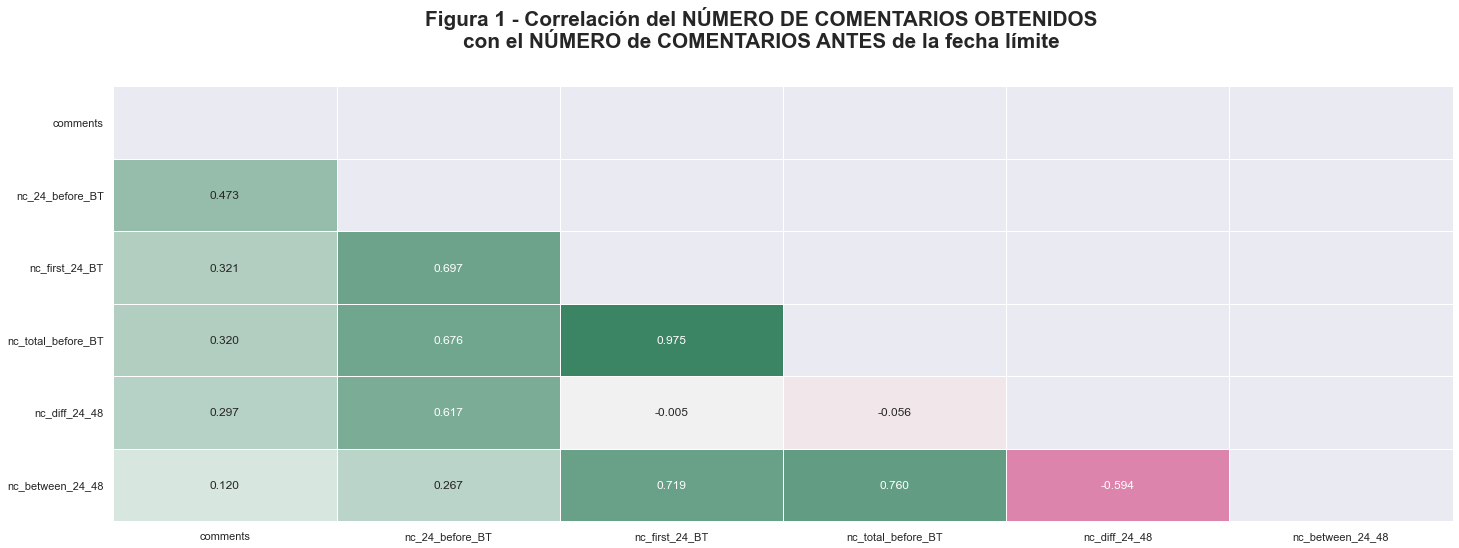

In [7]:

fig = set_figure(24, 8, 
                 suptitle='Figura 1' + ' - ' + \
                 'Correlación del NÚMERO DE COMENTARIOS OBTENIDOS' + '\n' + \
                 'con el NÚMERO de COMENTARIOS ANTES de la fecha límite')
show_corr(data=data_train[features['nc'] + [target]], target=target)


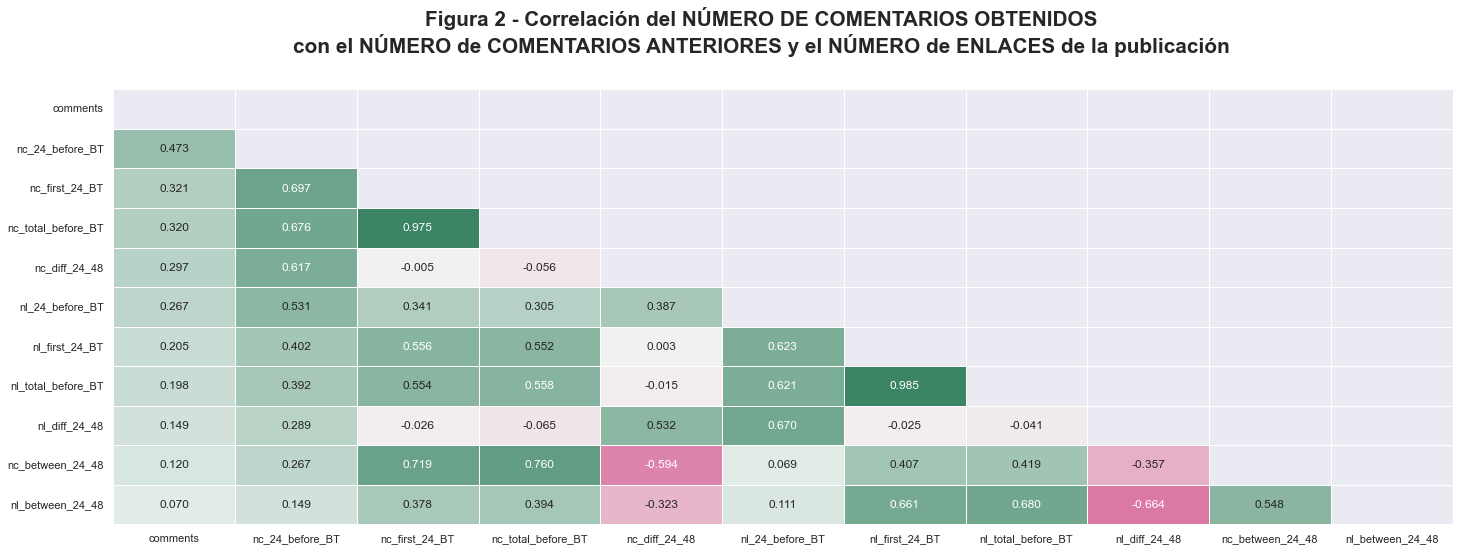

In [8]:

fig = set_figure(24, 8, 
                 suptitle='Figura 2' + ' - ' + \
                 'Correlación del NÚMERO DE COMENTARIOS OBTENIDOS' + '\n' + \
                 'con el NÚMERO de COMENTARIOS ANTERIORES y el NÚMERO de ENLACES de la publicación')
show_corr(data=data_train[features['nc'] + features['nl'] + [target]], target=target)


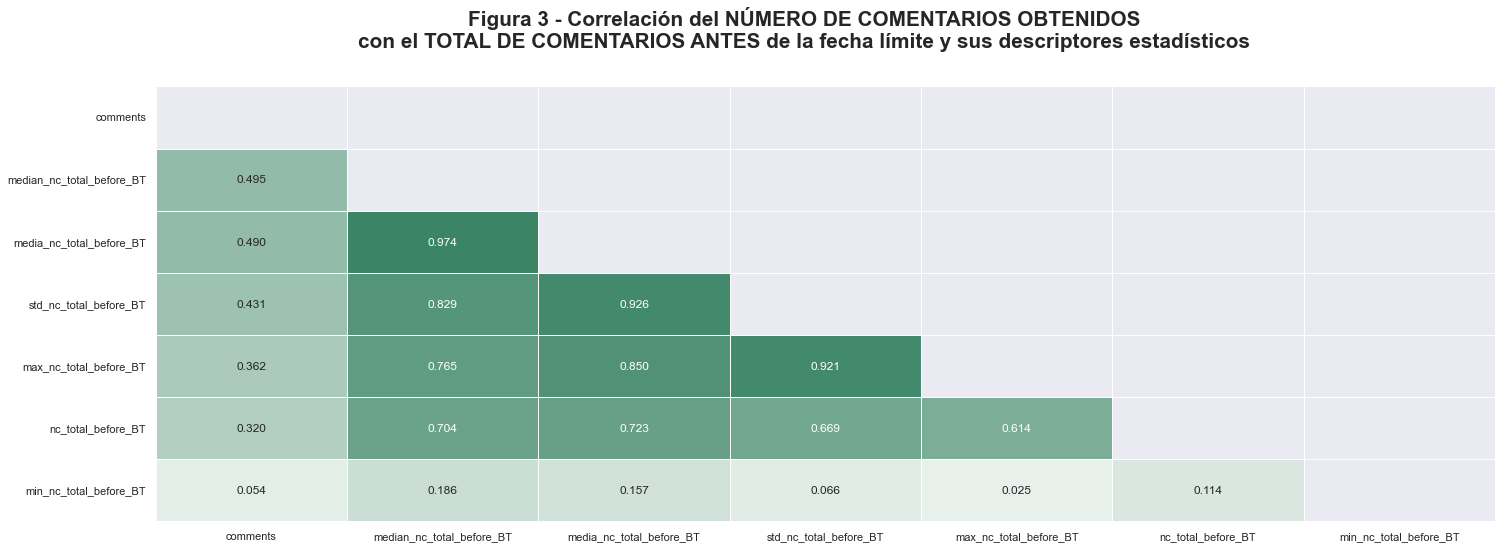

In [9]:

fig = set_figure(24, 8, 
                 suptitle='Figura 3' + ' - ' + \
                 'Correlación del NÚMERO DE COMENTARIOS OBTENIDOS' + '\n' + \
                 'con el TOTAL DE COMENTARIOS ANTES de la fecha límite y sus descriptores estadísticos')
show_corr(data=data_train[features['nc_total_before_BT'] + features['sd_nc_total_before_BT'] + [target]], target=target)


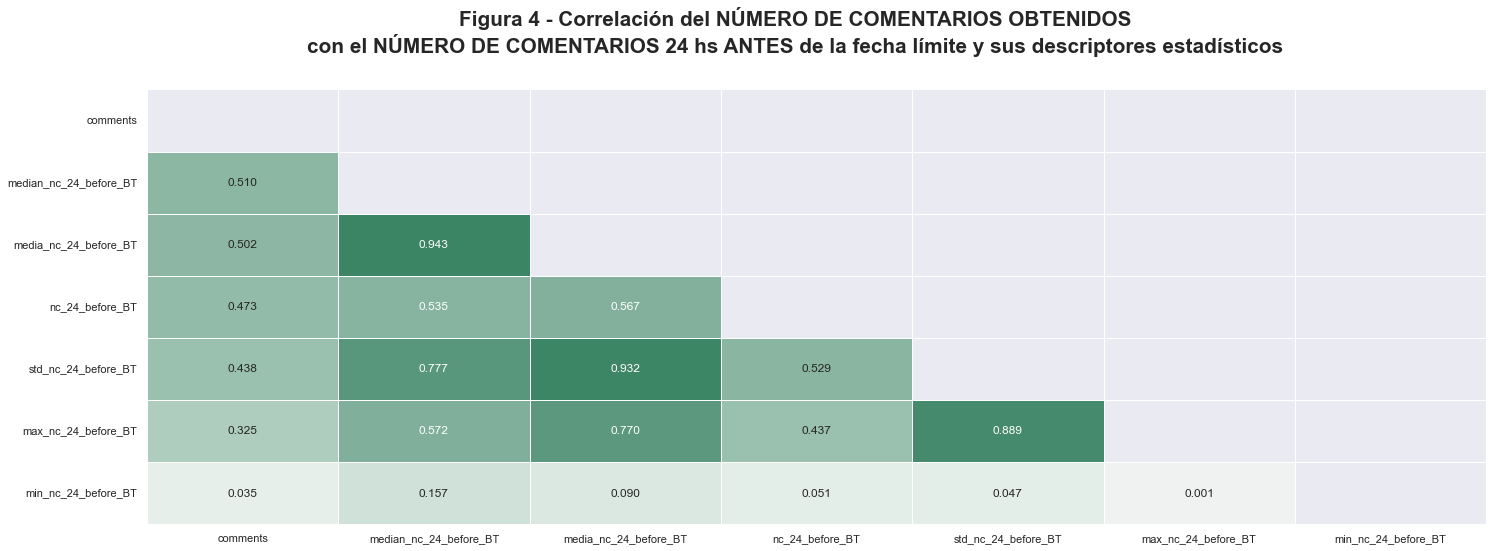

In [10]:

fig = set_figure(24, 8, 
                 suptitle='Figura 4' + ' - ' + \
                 'Correlación del NÚMERO DE COMENTARIOS OBTENIDOS' + '\n' + \
                 'con el NÚMERO DE COMENTARIOS 24 hs ANTES de la fecha límite y sus descriptores estadísticos')
show_corr(data=data_train[features['nc_24_before_BT'] + features['sd_nc_24_before_BT'] + [target]], target=target)


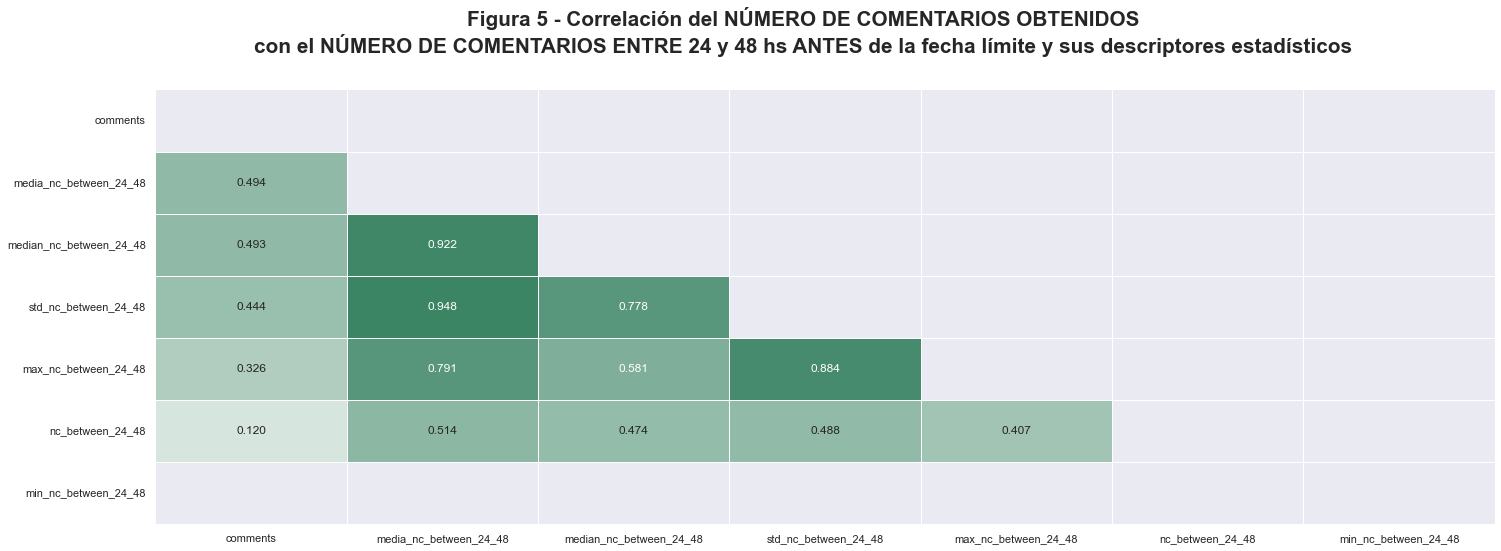

In [11]:

fig = set_figure(24, 8, 
                 suptitle='Figura 5' + ' - ' + \
                 'Correlación del NÚMERO DE COMENTARIOS OBTENIDOS' + '\n' + \
                 'con el NÚMERO DE COMENTARIOS ENTRE 24 y 48 hs ANTES de la fecha límite y sus descriptores estadísticos')
show_corr(data=data_train[features['nc_between_24_48'] + features['sd_nc_between_24_48'] + [target]], target=target)


---
<a id="ExploratoryDataAnalysis_3_2"></a>
#### 3.2. Correlaciones con palabras frecuentes y días de publicación

- En **Figura 6** se observa que la correlación del número de comentarios obtenidos después de la fecha límite es muy baja en relación a las palabras más utilizadas en el texto de la publicación

- En **Figura 7** se observa que la correlación del número de comentarios obtenidos después de la fecha límite también es muy baja en relación a los días de la semana en que se hizo la publicación así como la fecha límite misma


<p style="text-align:right;"><a href="#Content">Contenido</a></p>

---

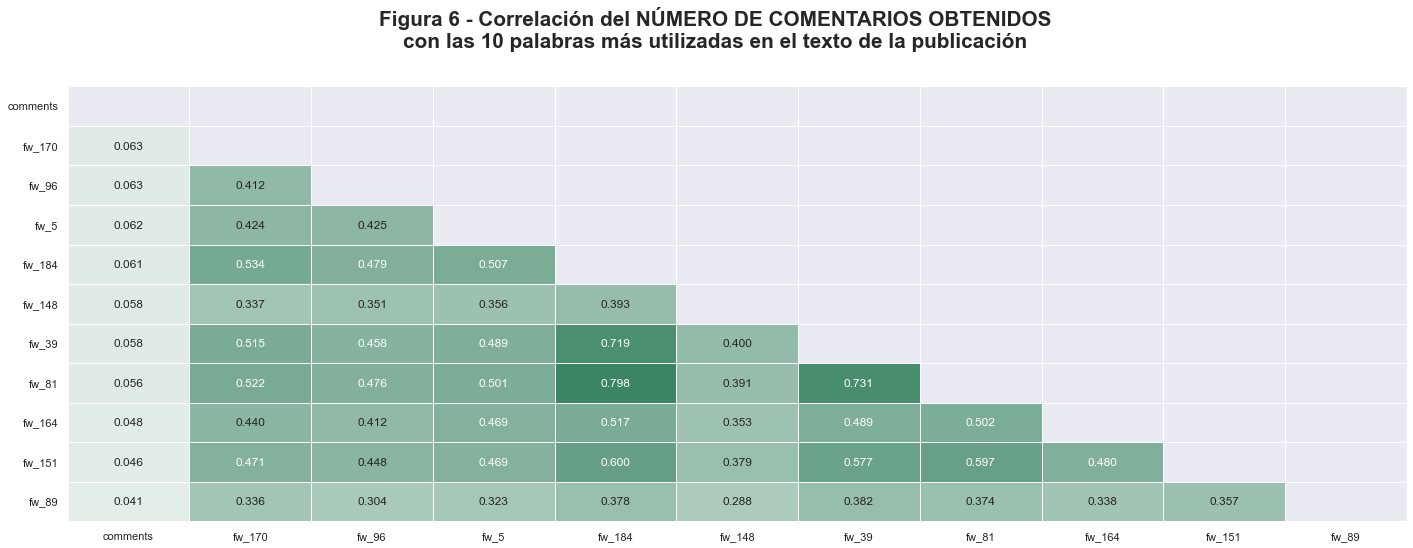

In [12]:

def get_frequent_word_counts_list(data) :
    u'''
    '''

    result = pd.DataFrame(columns=['count'], data=data.sum() )
    result.reset_index(drop=False, inplace=True)
    result.rename(columns={'index' : 'word'}, inplace=True)
    result.sort_values(by='count', ascending=False, inplace=True)
    
    return list(result['word'])


first_10_words = get_frequent_word_counts_list(data_train[features['frequent_word']])[:10]

fig = set_figure(24, 8, 
                 suptitle='Figura 6' + ' - ' + \
                 'Correlación del NÚMERO DE COMENTARIOS OBTENIDOS' + '\n' + \
                 'con las 10 palabras más utilizadas en el texto de la publicación')
show_corr(data=data_train[first_10_words + [target]], target=target)



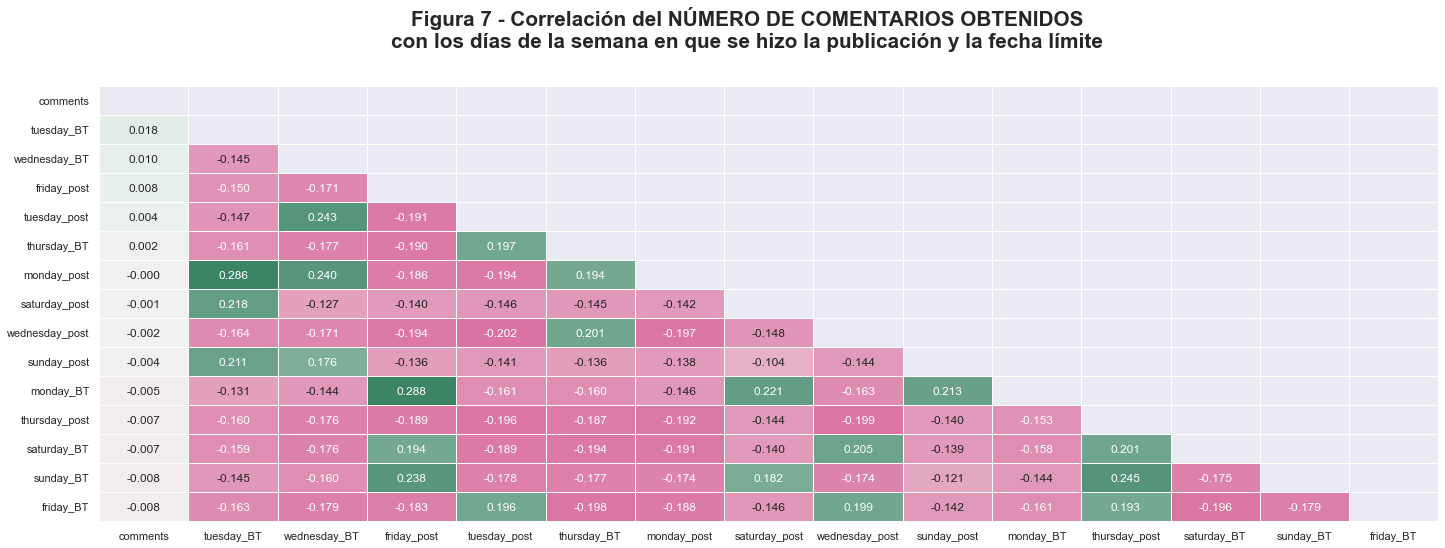

In [13]:

fig = set_figure(24, 8, 
                 suptitle='Figura 7' + ' - ' + \
                 'Correlación del NÚMERO DE COMENTARIOS OBTENIDOS' + '\n' + \
                 'con los días de la semana en que se hizo la publicación y la fecha límite')
show_corr(data=data_train[features['weekday_BT'] + features['weekday_post'] + [target]], target=target)


---
<a id="ExploratoryDataAnalysis_3_3"></a>
#### 3.3. Relación de la cantidad de comentarios obtenidos según conteo de publicaciones

- En **Figura 8** se aprecia que son pocas (menos del 4%) las publicaciones que obtienen un número de comentarios mayor o igual a 30

- En **Figura 9** se presenta la información sobre publicaciones que obtienen un número de comentarios menor a 30

<p style="text-align:right;"><a href="#Content">Contenido</a></p>

---

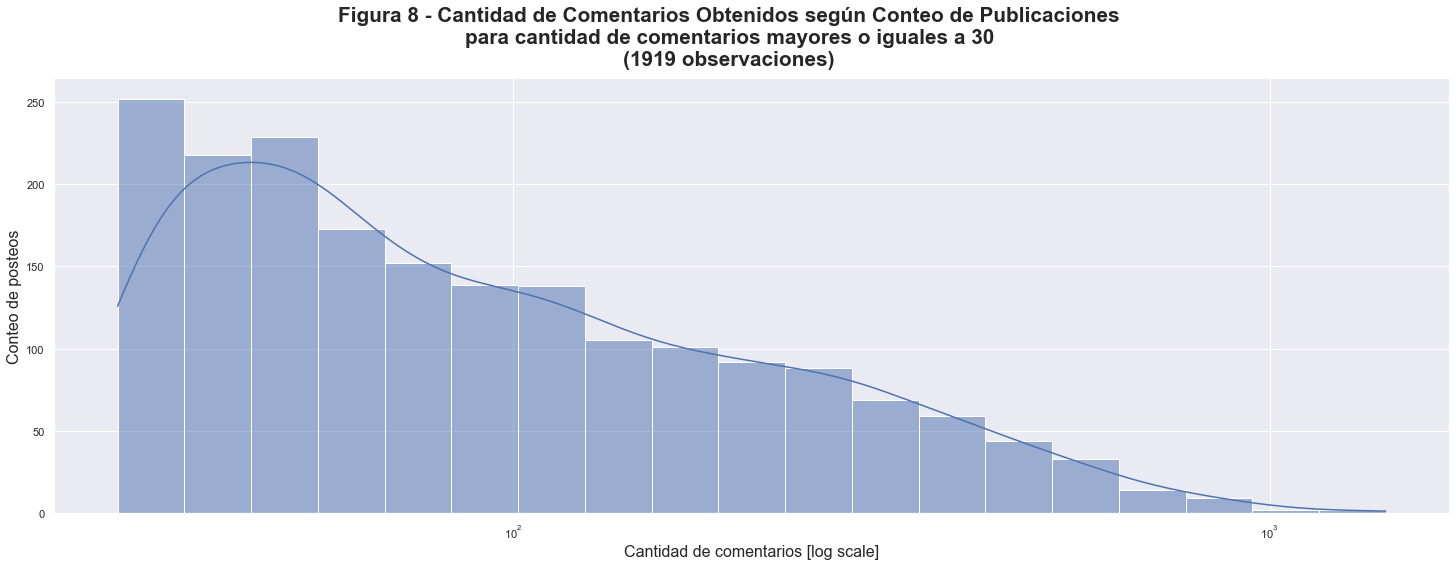

In [29]:
def get_obyc(data) :
    u'''
    '''
    temp1 = pd.DataFrame(data['comments'].value_counts())
    temp1.reset_index(inplace=True)
    temp1.columns = ['comments count', 'publications']
    temp1 = temp1.astype({'comments count':'int64'})
    return temp1

data_obyc = get_obyc(data_train)

set_figure(25, 8, 
           suptitle='Figura 8' + ' - ' + \
           'Cantidad de Comentarios Obtenidos según Conteo de Publicaciones' + '\n' + \
           'para cantidad de comentarios mayores o iguales a 30' + '\n' + \
           '(' + str(data_train[data_train['comments']>=30].shape[0]) + ' observaciones)', y=0.95,)
fig8 = sns.histplot(data=data_train[data_train['comments']>=30], x='comments', kde=True, log_scale=True);
fig8.set_xlabel('Cantidad de comentarios [log scale]')
fig8.set_ylabel('Conteo de posteos');

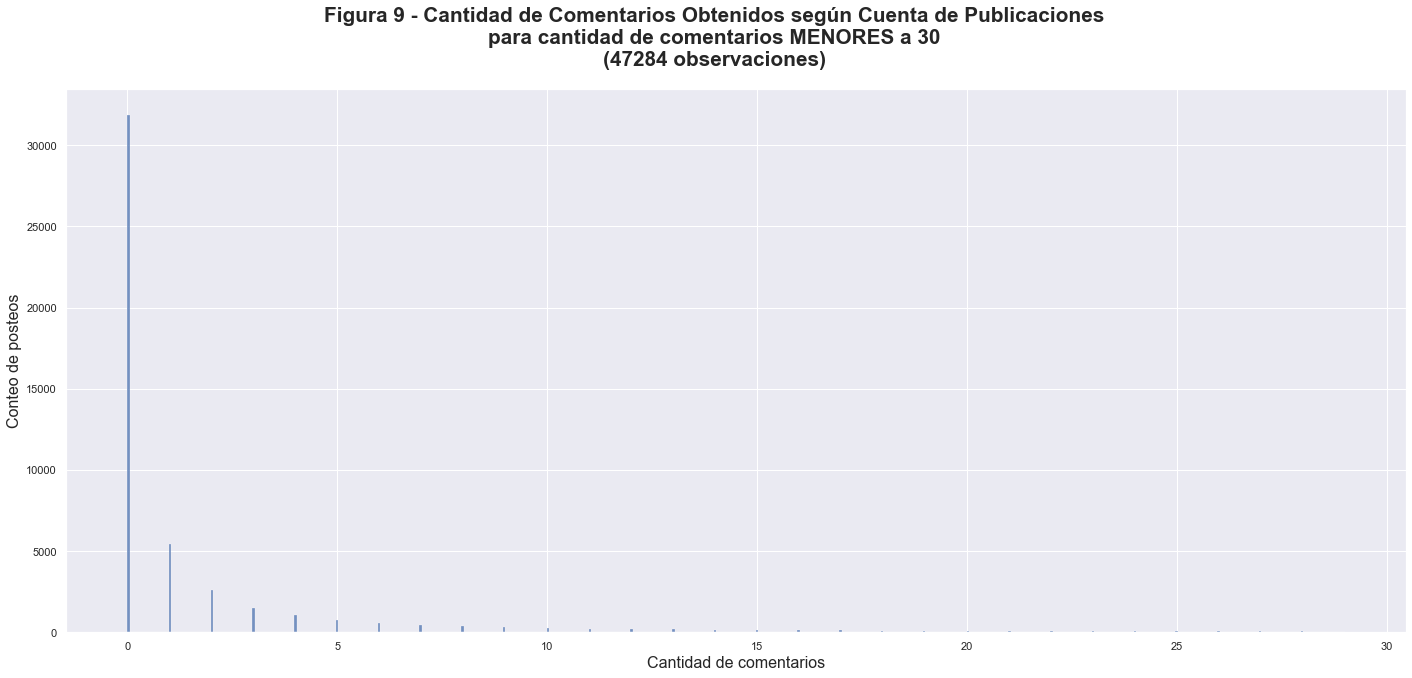

In [15]:
set_figure(24, 10, 
           suptitle='Figura 9' + ' - ' + \
           'Cantidad de Comentarios Obtenidos según Cuenta de Publicaciones' + '\n' + \
           'para cantidad de comentarios MENORES a 30' + '\n' + \
           '(' + str(data_obyc[data_obyc['comments count']<30]['publications'].sum()) + ' observaciones)', y=0.95)
# sns.barplot(data=data_obyc[data_obyc['comments count']<30], y='comments count', x='publications', orient='v');
fig9 = sns.histplot(data=data_train[data_train['comments']<30], x='comments');
fig9.set_xlabel('Cantidad de comentarios')
fig9.set_ylabel('Conteo de posteos');

---

---

---
<a id="ProofOfConcept_3_4_1"></a>
### 3.4.1. Prueba de concepto para modelos de regresión

En la prueba de concepto para modelos de regresión con parámetros por defecto se observa que:

- Es posible predecir el número de comentarios a obtener en las próximas 24 horas con un **error de ± 25 comentarios**

- El *mejor tiempo* de entrenamiento es para el modelo XGBoost Regressor, sin embargo los parámetros por defecto presentan *un modelo sobreajustado*


<p style="text-align:right;"><a href="#Content">Contenido</a></p>

---

In [16]:
data_train = read_blogData_train()
data_test = read_blogData_test()

X_train = data_train.iloc[:,0:280].copy()
y_train = data_train.iloc[:,-1].copy()

X_test = data_test.iloc[:,0:280].copy()
y_test = data_test.iloc[:,-1].copy()

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [17]:

def regression_proof_of_concept() :
    u'''
    '''

    class POC_Model :
        def __init__(self, name, estimator) :
            self.name = name
            self.estimator = estimator
            return    

# ---

    models = []
    models.append( POC_Model(
        name='Linear Regression', 
        estimator=LinearRegression(
            n_jobs=-1, # use all processors
        ) 
    ) )

    models.append( POC_Model(
        name='Random Forest Regressor', 
        estimator=RandomForestRegressor(
            n_jobs=-1, # use all processors
        ) 
    ) )

    models.append( POC_Model(
        name='Gradient Boosting Regressor', 
        estimator=GradientBoostingRegressor() 
    ) )

    models.append( POC_Model(
        name='XGBoost Regressor', 
        estimator=xgb.XGBRegressor(
            n_jobs=-1, # use all processors
        ) 
    ) )

# ---

    poc_results = pd.DataFrame(columns=['model', 'fit time', 'train RMSE', 'test RMSE'])

    for m in models :
        print('Prueba de concepto para', m.name, '... ', end='')
        fit_time = time.time()
        m.estimator.fit(X_train, y_train)
        fit_time = ROUND(time.time() - fit_time)
        print(fit_time, 'segundos')

        y_train_pred = m.estimator.predict(X_train)
        train_rmse = ROUND(np.sqrt(mean_squared_error(y_train, y_train_pred)))
        y_test_pred = m.estimator.predict(X_test)
        test_rmse = ROUND(np.sqrt(mean_squared_error(y_test, y_test_pred)))

        poc_results = poc_results.append(
            pd.Series(
                data=[m.name, 
                      fit_time, 
                      train_rmse, 
                      test_rmse
                     ], 
                index=poc_results.columns), 
            ignore_index=True
        )

    # pd.options.display.max_colwidth = 500 
    display(poc_results)
    return

# comment to hide proof of concept
# regression_proof_of_concept()


---
<a id="GridSearch_Evaluate_3_4_2"></a>
### 3.4.2. Evaluación de hiper parámetros para XGBRegressor

- Regularizar el modelo XGBoost es fundamental dado que los parámetros por defecto presentan sobreajuste (overfitting)

- En la documentación se encuentra que los parámetros: **reg_alpha**, **reg_lambda** y **subsample** permiten controlar el overfitting

<p style="text-align:right;"><a href="#Content">Contenido</a></p>


---

In [18]:

def gridsearch_evaluate(X_train, y_train) :
    u'''
    '''

    class GS_Estimator :
        u'''
        '''

        def __init__(self, name, estimator, gs_param_grid=None) :
            self.name = name
            self.estimator = estimator
            self.gs_param_grid = gs_param_grid
            self.gs_estimator = None

            return        
# ---
    models = []

    models.append(
        GS_Estimator(
            name='XGBoost Regressor L1 y L2',
            estimator=xgb.XGBRegressor(),
            gs_param_grid={
                'eval_metric' : ['rmse'], # root mean square error
                'gamma' : [1], # (min_split_loss) minimum loss reduction
                'learning_rate' : [0.2], # (eta) step size shrinkage
                'max_depth' : [8], # maximum depth of tree
                'n_estimators' : [1000], 
                'n_jobs' : [-1], # use all processors
                'objective' : ['reg:squarederror'], # regression with squared loss
                'random_state' : [127], 
                'reg_alpha' : [1000], # L1 regularization
                'reg_lambda' : [1000], # L2 regularization
                'subsample' : [0.1], # prevents overfitting
            }
        )
    )
    
# ---

    gs_results = pd.DataFrame(columns=['model', 'best params', 'best score', 'train RMSE'])

    for m in models :
        scoring = 'neg_root_mean_squared_error'
        cv = StratifiedKFold(n_splits=2, random_state=11, shuffle=True)
        gs = GridSearchCV(
            estimator=m.estimator, # scikit-learn estimator interface
            param_grid=m.gs_param_grid, # dictionart key=parametrer, value=list of paraameter posible values
            scoring=scoring, # strategy to evaluate performance of cross-validated
            n_jobs=-2, # jobs in parallel -2 : all processors minus one
            refit=True, # refit estimator using best parameters
            cv=cv, # cross-validated splitting strategy
            return_train_score=False, # include training scores
            verbose=1 # display fold parameters, score, time, ...
        )
        
        print('Gridsearch para', m.name, '...')

        gs.fit(X_train, y_train)
        m.gs_estimator = gs.best_estimator_
        
        y_train_pred = gs.predict(X_train)
        gs_train_rmse = ROUND(np.sqrt(mean_squared_error(y_train, y_train_pred)))

        gs_results = gs_results.append(
            pd.Series(
                data=[m.name, 
                      gs.best_params_, 
                      gs.best_score_, 
                      gs_train_rmse
                     ], 
                index=gs_results.columns
                ),
            ignore_index=True
        )

    pd.options.display.max_colwidth = 500 
    display(gs_results.sort_values(by=['train RMSE'], axis='index'))
    
    return

# CAUTION !!!, it take a lot of time to run grid search
# comment to hide grid search evaluate
# gridsearch_evaluate(X_train, y_train)


---
<a id="Evaluate_Regression_Model_3_4_3"></a>
### 3.4.3. Evaluación del modelo de regresión

- ???

<p style="text-align:right;"><a href="#Content">Contenido</a></p>


---

In [19]:
def evaluate_regression_model() :
    u'''
    '''

# ---    
    class Eval_Estimator :
        u'''
        '''

        def __init__(self, name, estimator, params=None) :
            self.name = name
            self.estimator = estimator
            self.params = params

            return        
# ---
    data_raw = read_blogData_train()

    X_train = data_raw.iloc[:,0:280]
    y_train = data_raw.iloc[:,-1].copy()

    # X_test = test_raw.iloc[:,0:280]
    # y_test = test_raw.iloc[:,-1].copy()

    # X_train = X_train.iloc[:, 0:62].copy()
    # X_test = X_test.iloc[:, 0:62].copy()

    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    # X_test = scaler.transform(X_test)
# ---
    model = Eval_Estimator(
        name='XGBRegressor L1 y L2', 
        estimator=xgb.XGBRegressor(), 
        params={
            'eval_metric' : 'rmse', # root mean square error
            'gamma': 1, # (min_split_loss) minimum loss reduction
            'learning_rate': 0.2, # (eta) step size shrinkage
            'max_depth': 8, # maximum depth of tree
            'n_estimators': 1000, 
            'n_jobs': -1, # use all processors
            'objective' : 'reg:squarederror', # regression with squared loss
            'random_state': 127, 
            'reg_alpha': 1000, # (alpha) L1 regularization
            'reg_lambda': 1000, # (lambda) L2 regularization
            'subsample' : 0.1, # prevents overfitting
        }
    )
# ---
    model.estimator.set_params(**model.params)
    print('Entrenando modelo', model.name, '...')
    model.estimator.fit(X_train, y_train)
# ---
    class Eval_TestCase :
        u'''
        '''
        def __init__(self, case, data) :
            self.case = case
            self.data = data
            return    
# ---
    filepath = './data/test/'
    filelist = [os.path.join(filepath, filename) for filename in os.listdir(filepath) if os.path.isfile(os.path.join(filepath, filename))]

    caselist = []
    for filename in filelist :
        temp_raw = pd.read_csv(filename, header=None)
        temp_raw.drop_duplicates(inplace=True)
        
        pos = filename.index('2012')
        caselist.append( Eval_TestCase(filename[pos: pos+10], temp_raw) )
# ---
    results = pd.DataFrame(columns=['case', 'count', 'y mean', 'y std', 'y min', 'y max', 'RMSE'])

    for e in caselist :
        X = e.data.iloc[:,0:280]
        y = e.data.iloc[:,-1]
        X = scaler.transform(X)
        p = model.estimator.predict(X)
        rmse = ROUND(np.sqrt(mean_squared_error(y, p)))

        results = results.append(
            pd.Series(
                data=[e.case, 
                      y.shape[0], 
                      ROUND(y.mean()), 
                      ROUND(y.std()), 
                      ROUND(y.min()), 
                      ROUND(y.max()), 
                      rmse
                     ], 
                index=results.columns), 
            ignore_index=True
        )
        
    return results
# ---


In [20]:
# comment to hide evaluate of regression model
# results = evaluate_regression_model()
# display(results.sample(5))
# display(results[['RMSE']].describe().transpose())

---


---
<a id="ProofOfConcept_3_5_1"></a>
### 3.5.1. Prueba de concepto para modelos de clasificación

En la prueba de concepto para modelos de clasificación con parámetros por defecto se observa que:

- ???

- El *mejor tiempo* de entrenamiento es para el modelo ???


<p style="text-align:right;"><a href="#Content">Contenido</a></p>

---

In [21]:

# to_classes = lambda v : 0 if v < 30 else (1 if v < 90 else (2 if v < 150 else (3 if v < 210 else 4)))
# to_classes = lambda v : 0 if v < 30 else (1 if v < 90 else 2)
to_classes = lambda v : 0 if v < 30 else 1


In [22]:

data_train = read_blogData_train()
data_test = read_blogData_test()

X_train = data_train.iloc[:,0:280].copy()
y_train = data_train.iloc[:,-1].copy()
y_train = y_train.apply(to_classes)

X_test = data_test.iloc[:,0:280].copy()
y_test = data_test.iloc[:,-1].copy()
y_test = y_test.apply(to_classes)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


              precision    recall  f1-score   support

           0   0.995575  0.009517  0.018854     47284
           1   0.039322  0.998958  0.075666      1919

    accuracy                       0.048107     49203
   macro avg   0.517449  0.504237  0.047260     49203
weighted avg   0.958280  0.048107  0.021069     49203



              precision    recall  f1-score   support

           0   0.951613  0.008684  0.017211      6794
           1   0.034270  0.987603  0.066242       242

    accuracy                       0.042354      7036
   macro avg   0.492942  0.498144  0.041726      7036
weighted avg   0.920061  0.042354  0.018898      7036



              precision    recall  f1-score   support

           0   0.969132  0.997970  0.983339     47284
           1   0.812500  0.216780  0.342246      1919

    accuracy                       0.967502     49203
   macro avg   0.890816  0.607375  0.662793     49203
weighted avg   0.963023  0.967502  0.958336     49203



              precision    recall  f1-score   support

           0   0.968607  0.999117  0.983626      6794
           1   0.785714  0.090909  0.162963       242

    accuracy                       0.967879      7036
   macro avg   0.877161  0.545013  0.573294      7036
weighted avg   0.962317  0.967879  0.955399      7036



              precision    recall  f1-score   support

           0   0.981930  0.994078  0.987967     47284
           1   0.790105  0.549244  0.648017      1919

    accuracy                       0.976729     49203
   macro avg   0.886017  0.771661  0.817992     49203
weighted avg   0.974448  0.976729  0.974708     49203



              precision    recall  f1-score   support

           0   0.979396  0.993524  0.986409      6794
           1   0.694444  0.413223  0.518135       242

    accuracy                       0.973565      7036
   macro avg   0.836920  0.703373  0.752272      7036
weighted avg   0.969596  0.973565  0.970303      7036



              precision    recall  f1-score   support

           0   0.991539  0.998858  0.995185     47284
           1   0.965605  0.789995  0.869017      1919

    accuracy                       0.990712     49203
   macro avg   0.978572  0.894426  0.932101     49203
weighted avg   0.990528  0.990712  0.990264     49203



              precision    recall  f1-score   support

           0   0.979858  0.995290  0.987514      6794
           1   0.762963  0.425620  0.546419       242

    accuracy                       0.975696      7036
   macro avg   0.871410  0.710455  0.766966      7036
weighted avg   0.972398  0.975696  0.972342      7036



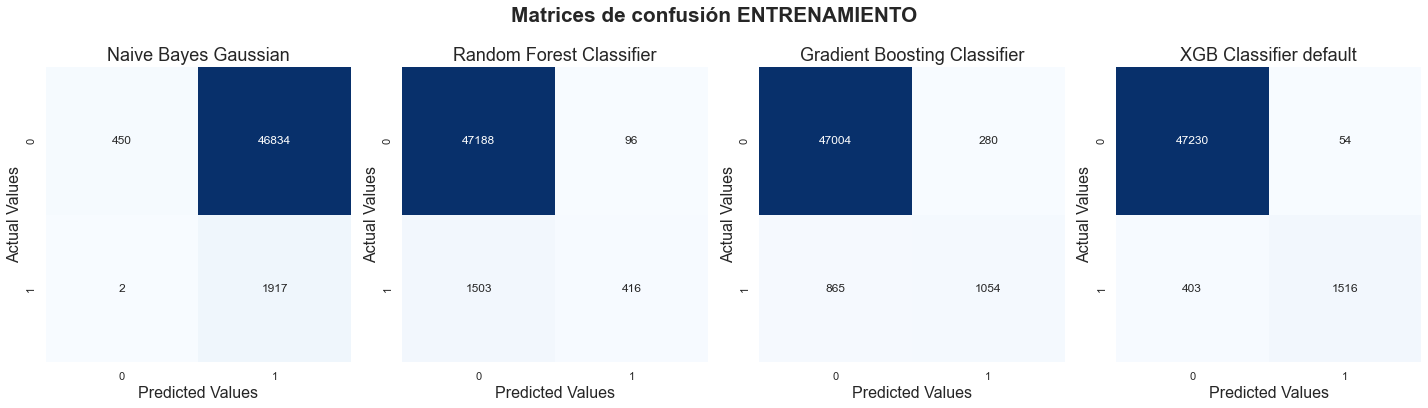

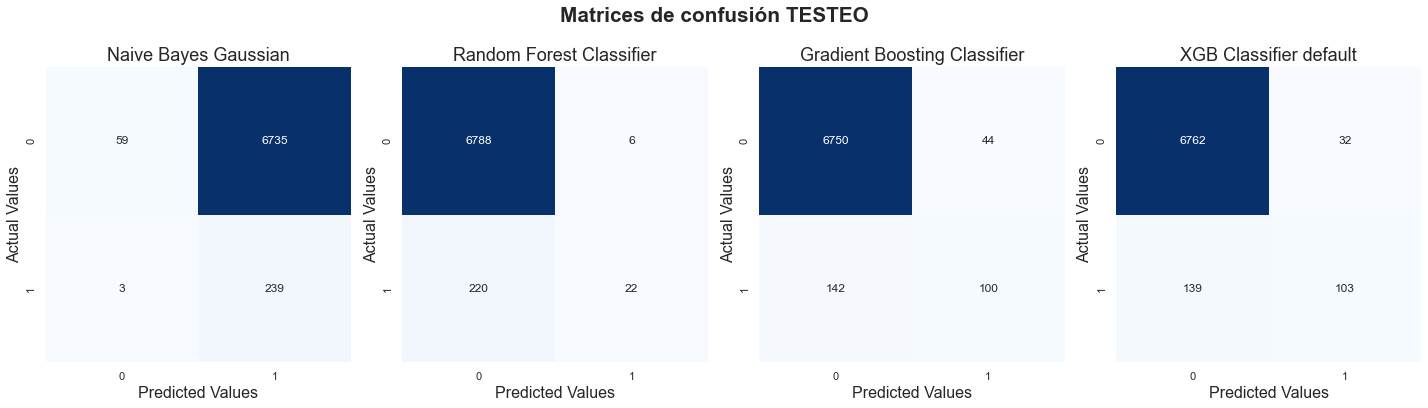

In [23]:

def classification_proof_of_concept() :
    u'''
    '''

    class POC_Model :
        def __init__(self, name, estimator) :
            self.name = name
            self.estimator = estimator
            return    

# ---

    models = []
    models.append( POC_Model(
        name='Naive Bayes Gaussian', 
        estimator=GaussianNB() 
    ) )

    models.append( POC_Model(
        name='Random Forest Classifier', 
        estimator=RandomForestClassifier(
            n_estimators=100, 
            criterion='gini', 
            max_depth=3, 
            bootstrap=True, 
            n_jobs=-1, 
            max_samples=0.3, 
            random_state=127
        ) 
    ) )

    models.append( POC_Model(
        name='Gradient Boosting Classifier', 
        estimator=GradientBoostingClassifier(
            # loss='log_loss', # loss function to optimize ???
            learning_rate=0.1, # contribution of each tree
            n_estimators=100, # large values -> better performance
            subsample=1, #  values < 1.0 -> low variance and high bias
            criterion='friedman_mse', # measure the quality of a split
            max_depth=3, # tree depth limits the number of nodes
            random_state=127
        )  
    ) )

    models.append( POC_Model(
        name='XGB Classifier default', 
        estimator=xgb.XGBClassifier(
            eval_metric='auc', # 
            n_jobs=-1, # use all processors
            objective='binary:logistic', # for binary classification 
            # objective='multi:softprob', # for multi-class classification
            random_state=127, 
        ) 
    ) )
    
# ---

    for m in models :
        m.estimator.fit(X_train, y_train)
        
        y_pred = m.estimator.predict(X_train)
        display(HTML('<b>' + m.name + ' ENTRENAMIENTO</b>'))
        print(classification_report(y_train, y_pred, digits=6, target_names=None, output_dict=False))

        y_pred = m.estimator.predict(X_test)
        display(HTML('<b>' + m.name + ' TESTEO</b>'))
        print(classification_report(y_test, y_pred, digits=6, target_names=None, output_dict=False))

# ---
        
    fig = set_figure(20, 10, 'Matrices de confusión ENTRENAMIENTO')
    cols = 4
    rows = (len(models) // cols) + 1

    for i, m in enumerate(models) :
        y_pred = m.estimator.predict(X_train)

        plt.subplot(rows, cols, i+1)
        ax=sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt="d", cmap='Blues', cbar=False)
        plt.tight_layout();
        plt.title(m.name);
        plt.ylabel('Actual Values')
        plt.xlabel('Predicted Values')
        
    fig = set_figure(20, 10, 'Matrices de confusión TESTEO')
    cols = 4
    rows = (len(models) // cols) + 1
    
    for i, m in enumerate(models) :
        y_pred = m.estimator.predict(X_test)

        plt.subplot(rows, cols, i+1)
        ax=sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap='Blues', cbar=False)
        plt.tight_layout();
        plt.title(m.name);
        plt.ylabel('Actual Values')
        plt.xlabel('Predicted Values')

    return

# comment to hide proof of concept
classification_proof_of_concept()


---
<a id="GridSearch_Evaluate_3_5_2"></a>
### 3.5.2. Evaluación de hiper parámetros para XGBClassifier

- ???

<p style="text-align:right;"><a href="#Content">Contenido</a></p>


---

In [24]:

def classification_gridsearch_evaluate(X_train, y_train) :
    u'''
    '''
# ---
    class GS_Estimator :
        u'''
        '''

        def __init__(self, name, estimator, gs_param_grid=None) :
            self.name = name
            self.estimator = estimator
            self.gs_param_grid = gs_param_grid
            self.gs_estimator = None

            return        
# ---
    models = []

    models.append(
        GS_Estimator(
            name='XGBoost Classifier 1',
            estimator=xgb.XGBClassifier(),
            gs_param_grid={
                'eval_metric' : ['auc'], # 
                'gamma' : [0, 1], # (min_split_loss) minimum loss reduction
                'learning_rate' : [0.1], # (eta) step size shrinkage
                'max_depth' : [6], # maximum depth of tree
                'n_estimators' : [100], 
                'n_jobs' : [-1], # use all processors
                'objective' : ['binary:logistic'], # for binary classification 
                'random_state' : [127], 
                # 'subsample' : [0.1, 0.5, 1], # prevents overfitting
            }
        )
    )
    models.append(
        GS_Estimator(
            name='XGBoost Classifier 2',
            estimator=xgb.XGBClassifier(),
            gs_param_grid={
                'eval_metric' : ['auc'], # 
                'gamma' : [0], # (min_split_loss) minimum loss reduction
                'learning_rate' : [0.1], # (eta) step size shrinkage
                'max_depth' : [8, 10], # maximum depth of tree
                'n_estimators' : [500], 
                'n_jobs' : [-1], # use all processors
                'objective' : ['binary:logistic'], # for binary classification 
                'random_state' : [127], 
                # 'subsample' : [0.1, 0.5, 1], # prevents overfitting
            }
        )
    )
    
# ---

    gs_results = pd.DataFrame(columns=['model', 'best params', 'best score', 'train ROC AUC'])

    for m in models :
        scoring = 'roc_auc'
        cv = StratifiedKFold(n_splits=2, random_state=11, shuffle=True)
        gs = GridSearchCV(
            estimator=m.estimator, # scikit-learn estimator interface
            param_grid=m.gs_param_grid, # dictionart key=parametrer, value=list of paraameter posible values
            scoring=scoring, # strategy to evaluate performance of cross-validated
            n_jobs=-2, # jobs in parallel -2 : all processors minus one
            refit=True, # refit estimator using best parameters
            cv=cv, # cross-validated splitting strategy
            return_train_score=False, # include training scores
            verbose=3 # display fold parameters, score, time, ...
        )
        
        print('Gridsearch para', m.name, '...')

        gs.fit(X_train, y_train)
        m.gs_estimator = gs.best_estimator_
        
        y_train_pred = gs.predict(X_train)
        gs_train_roc_auc = ROUND(roc_auc_score(y_train, y_train_pred))

        gs_results = gs_results.append(
            pd.Series(
                data=[m.name, 
                      gs.best_params_, 
                      gs.best_score_, 
                      gs_train_roc_auc
                     ], 
                index=gs_results.columns
                ),
            ignore_index=True
        )

    pd.options.display.max_colwidth = 500 
    display(gs_results.sort_values(by=['train ROC AUC'], axis='index'))
    
    # return

# CAUTION !!!, it take a lot of time to run grid search
# comment to hide grid search evaluate
# classification_gridsearch_evaluate(X_train, y_train)


---
<a id="Evaluate_Clasification_Model_3_5_3"></a>
### 3.5.3. Evaluación del modelo de clasificación

- ???

<p style="text-align:right;"><a href="#Content">Contenido</a></p>


---

In [25]:

def evaluate_classification_model() :
    u'''
    '''
# ---    
    class Eval_Estimator :
        u'''
        '''

        def __init__(self, name, estimator, params=None) :
            self.name = name
            self.estimator = estimator
            self.params = params

            return        
# ---
    data_raw = read_blogData_train()
    # test_raw = blogData_test_read()

    X_train = data_raw.iloc[:,0:280]
    y_train = data_raw.iloc[:,-1].copy()
    y_train = y_train.apply(to_classes)

    # X_test = test_raw.iloc[:,0:280]
    # y_test = test_raw.iloc[:,-1].copy()

    # X_train = X_train.iloc[:, 0:62].copy()
    # X_test = X_test.iloc[:, 0:62].copy()

    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    # X_test = scaler.transform(X_test)
# ---
    model = Eval_Estimator(
        name='XGBoost Classifier', 
        estimator=xgb.XGBClassifier(), 
        params={
            'eval_metric' : 'auc', # 
            'gamma' : 0, # (min_split_loss) minimum loss reduction
            'learning_rate' : 0.0001, # (eta) step size shrinkage
            'max_delta_step' : 1e6, # extremely imbalanced
            'max_depth' : 20, # maximum depth of tree
            'n_estimators' : 500, 
            'n_jobs' : -1, # use all processors
            'objective' : 'binary:logistic', # for binary classification 
            'random_state' : 127, 
            'verbosity' : 0, 
        }
    )
# ---
    model.estimator.set_params(**model.params)
    print('Entrenando modelo', model.name, '...')
    print(model.estimator.get_params())
    model.estimator.fit(X_train, y_train)
# ---
    class Eval_TestCase :
        u'''
        '''
        def __init__(self, case, data) :
            self.case = case
            self.data = data
            self.y_test = None
            self.y_pred = None
            return    
# ---
    filepath = './data/test/'
    filelist = [os.path.join(filepath, filename) for filename in os.listdir(filepath) if os.path.isfile(os.path.join(filepath, filename))]

    caselist = []
    for filename in filelist :
        temp_raw = pd.read_csv(filename, header=None)
        temp_raw.drop_duplicates(inplace=True)
        
        pos = filename.index('2012')
        caselist.append( Eval_TestCase(filename[pos: pos+10], temp_raw) )
# ---
    results = pd.DataFrame(columns=['case', 'count', 'ROC AUC', 'y_test', 'y_pred'])

    for e in caselist :
        X = e.data.iloc[:,0:280]
        y = e.data.iloc[:,-1]
        y = y.apply(to_classes)
        X = scaler.transform(X)
        p = model.estimator.predict(X)
        
        e.y_test = y
        e.y_pred = p
        
        try :
            roc_auc = ROUND(roc_auc_score(y, p))
        except :
            rec_auc = -1

        results = results.append(
            pd.Series(
                data=[e.case, 
                      y.shape[0], 
                      roc_auc, 
                      y, p 
                     ], 
                index=results.columns), 
            ignore_index=True
        )
        
    return results
# ---    


# comment to hide evaluate of regression model
results = evaluate_classification_model()
display(results[['case', 'count', 'ROC AUC']].sample(5))
display(results[['ROC AUC']].describe().transpose())

Entrenando modelo XGBoost Classifier ...
{'objective': 'binary:logistic', 'use_label_encoder': True, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'enable_categorical': False, 'gamma': 0, 'gpu_id': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.0001, 'max_delta_step': 1000000.0, 'max_depth': 20, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 500, 'n_jobs': -1, 'num_parallel_tree': None, 'predictor': None, 'random_state': 127, 'reg_alpha': None, 'reg_lambda': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': 0, 'eval_metric': 'auc'}


,case,count,ROC AUC
36,2012.03.08,111,0.7500
58,2012.03.30,188,0.6168
9,2012.02.10,135,0.8712
8,2012.02.09,144,0.8714
14,2012.02.15,123,0.7958


,count,mean,std,min,25%,50%,75%,max
ROC AUC,60.0,0.755022,0.152464,0.488,0.6647,0.7462,0.842525,1.0


In [26]:
def show_roc_curves(results) :
    
    fig = set_figure(row=24, col=40, suptitle='Areas bajo la curva', y=0.89, fontsize='x-large')
    cols = 6
    rows = (results.shape[0] // cols) + 1

    for i in range(results.shape[0]) :
        ax = plt.subplot(rows, cols, i+1)
        y = results.iloc[i]['y_test']
        p = results.iloc[i]['y_pred']

        RocCurveDisplay.from_predictions(y_true=y, y_pred=p, name='', ax=ax)
        plt.plot(np.arange(0, 1, step=0.01), np.arange(0, 1, step=0.01), linestyle='-.' )
        plt.xlabel('')
        plt.ylabel('')
    plt.show()
    return

# show_roc_curves(results)

Hay 53 Casos con ROC AUC mayor a 0.5


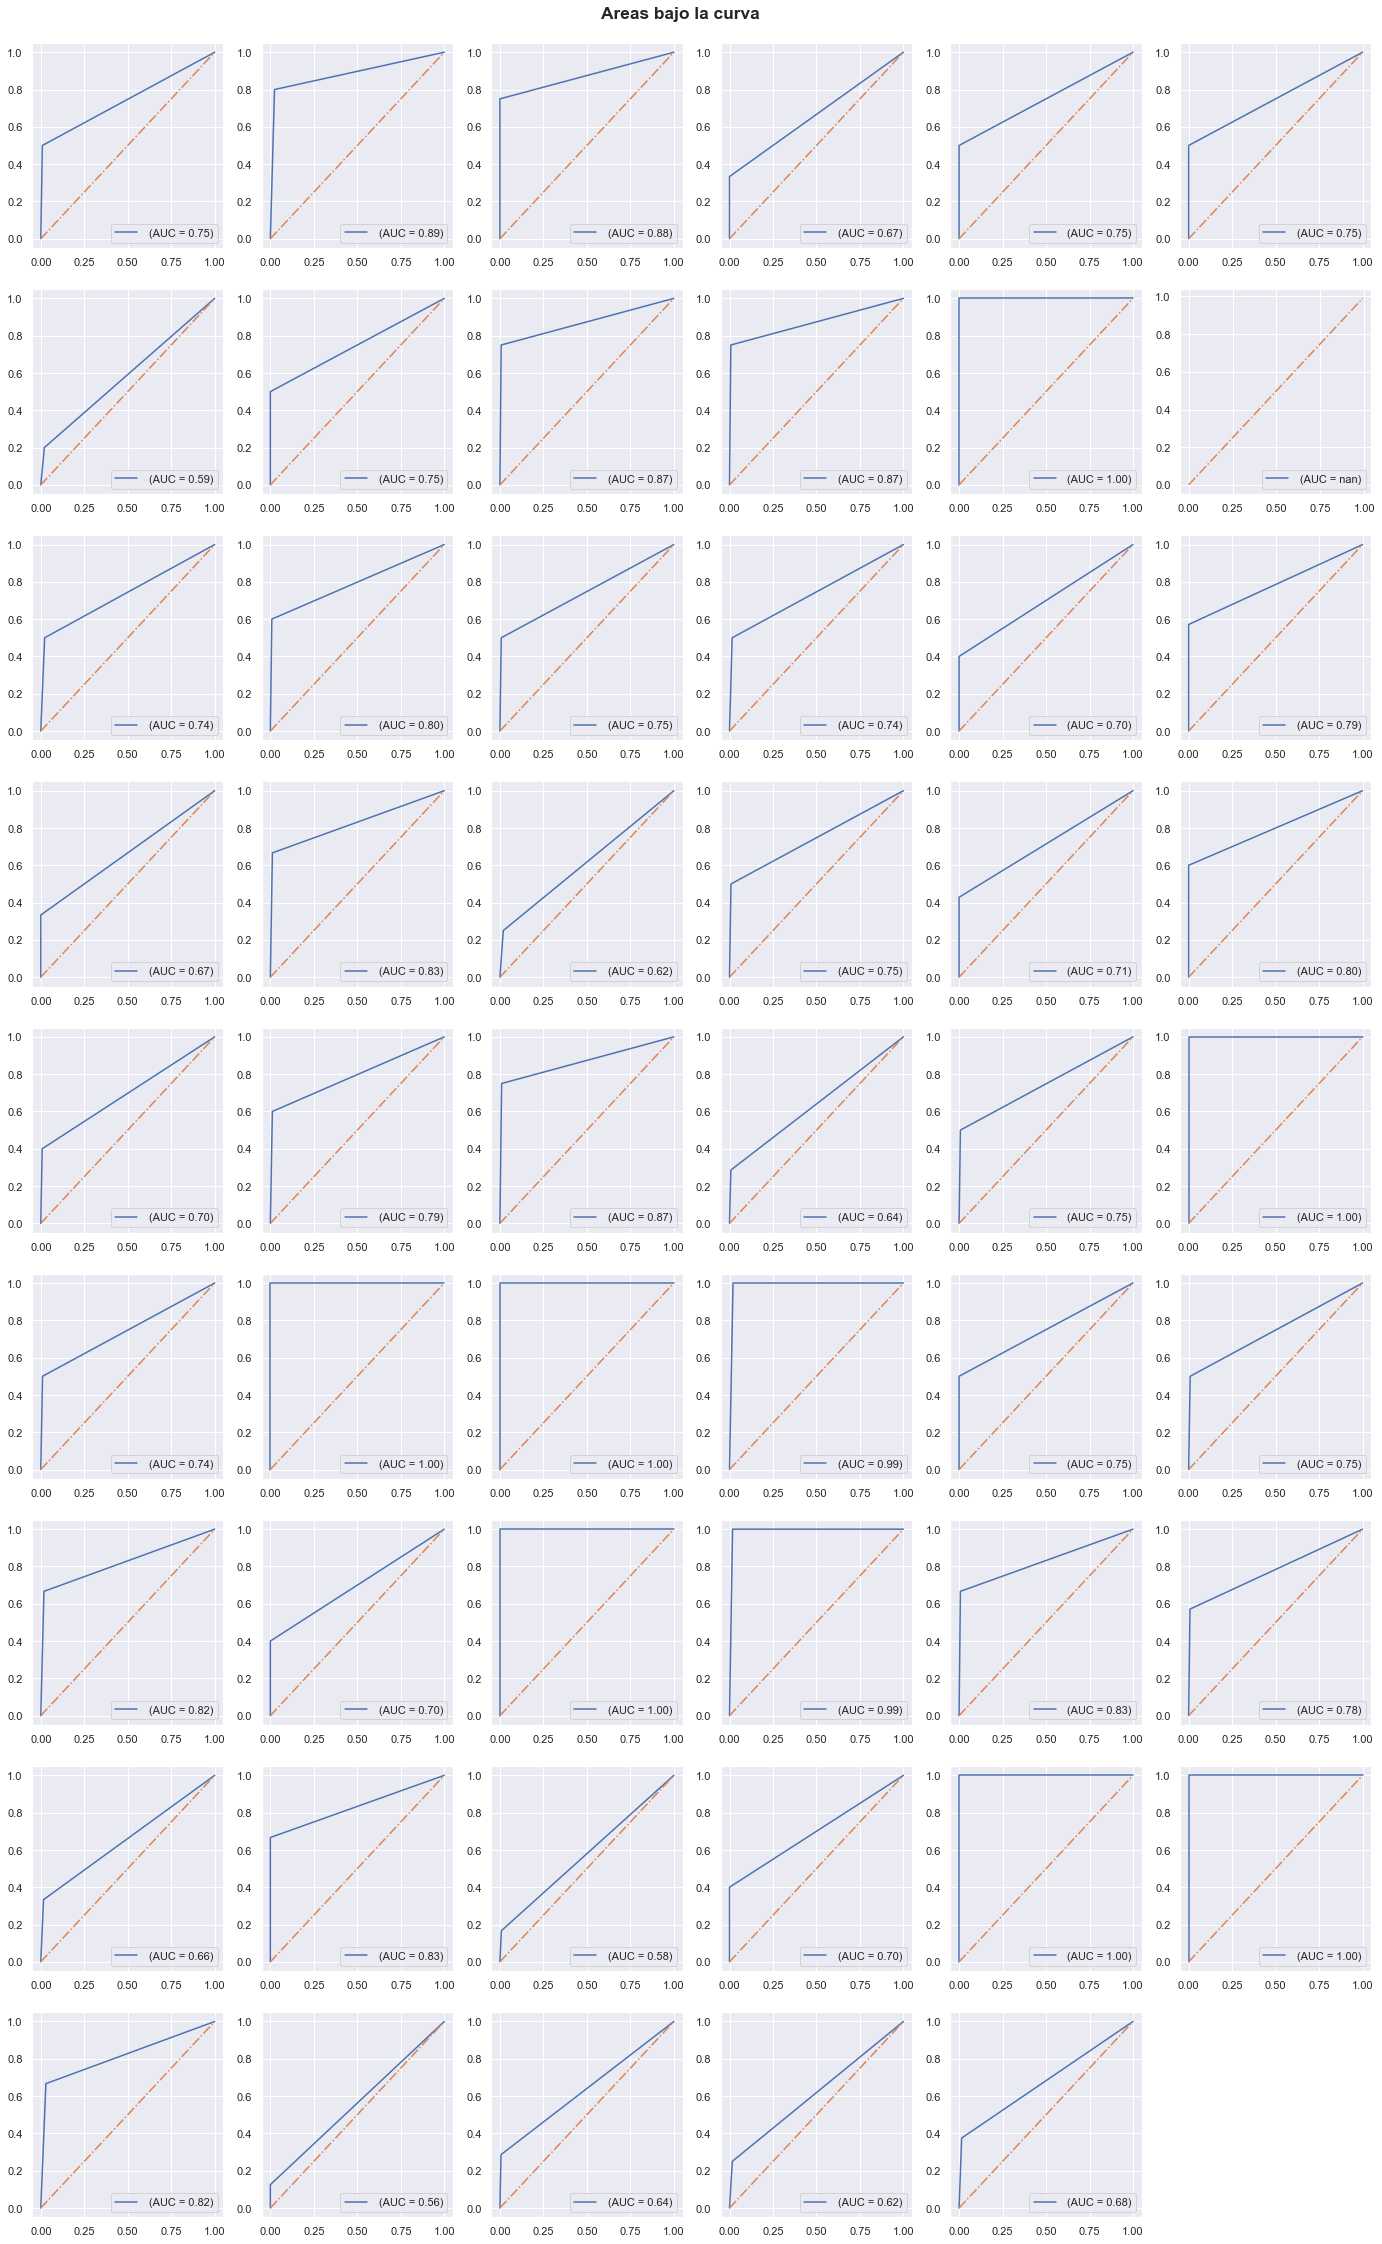

In [27]:
roc_auc_limit = 0.5
mask = results['ROC AUC'] > roc_auc_limit
print('Hay', results[mask].shape[0], 'Casos con ROC AUC mayor a', roc_auc_limit)
show_roc_curves(results[mask])

---
<a id="4_1"></a>
### 4.1. ...

- ???

<p style="text-align:right;"><a href="#Content">Contenido</a></p>


---

---
<a id="4_2"></a>
### 4.2. ...

- ???

<p style="text-align:right;"><a href="#Content">Contenido</a></p>


---